In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import animation
import numpy as np
import pandas as pd
import time
style.use("ggplot")

In [6]:
X = np.array([[1,2],
             [1.5,1.8],
              [5,8],
             [8,8],
              [1,0.6],
             [9,11]])

In [7]:
colors = 10*["g","r","c","b","k"]

In [20]:
class K_Means: #Taken from sklearn library 
    
    def __init__(self,k=2,tol=0.001,max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.all_c = {}
   
    def fit(self,data):
        fig = plt.figure()
        ax = plt.axes()
        
        def cenPlot(cent):
            for centroid in cent:
                plt.plot(cent[centroid][0],cent[centroid][1])
            plt.show()
            
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            self.all_c[i] = [[data[i][0]],[data[i][1]]]
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
                            
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                self.all_c[classification][0].append(self.centroids[classification][0])
                self.all_c[classification][1].append(self.centroids[classification][1])
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100 > self.tol):
                    optimized = False
                    
            if optimized or i==self.max_iter-1:
                cenPlot(self.all_c)
                break
                    
        #anim = animation.FuncAnimation(fig,animate,1000)
        #plt.show()
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

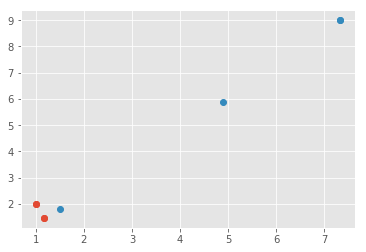

{0: [[1.0, 1.0, 1.1666666666666667, 1.1666666666666667], [2.0, 2.0, 1.4666666666666666, 1.4666666666666666]], 1: [[1.5, 4.9, 7.333333333333333, 7.333333333333333], [1.8, 5.880000000000001, 9.0, 9.0]]}


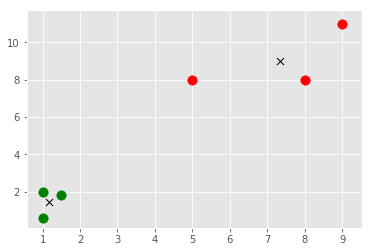

In [22]:
clf = K_Means(k=2,tol=0.001,max_iter=300)
clf.fit(X)
clf.predict([9,10])
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker = "o",s=90,color = color)
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker = "x" , color = "k",s=50,linewidth = 1)
print(clf.all_c)

In [63]:
df = pd.read_csv('Breast-Cancer.csv',na_values = ['?'])
means = df.mean().to_dict()
header = list(df)[:-3]
for h in header:
    df.drop([h],1,inplace=True)
header = list(df)
df.fillna(df.mean(),inplace = True)
full_data = df.astype(float).values.tolist()

[[1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [7.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [7.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 5.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [4.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0],
 [3.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 2.0, 4.0],
 [1.0, 1.0, 2.0],
 [4.0, 4.0, 4.0],
 [10.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [3.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [6.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [4.0, 3.0, 4.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [9.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [6.0, 1.0, 4.0],
 [5.0, 1.0, 4.0],
 [8.0, 1.0, 2.0],
 [5.0, 2.0, 4.0],
 [3.0, 3.0, 4.0],
 [1.0, 1.0, 4.0],
 [10.0, 1.0, 4.0],
 [1.0, 2.0, 2.0],
 [8.0, 1.0, 4.0],
 [1.0, 1.0, 2.0],
 [1.0, 1.0, 2.0],
 [8.0, 2.0, 4.0],
 [1.0, 5.0, 4.0],
 [4.0, 1.0, 4.0],
 [10.0, 2.0, 4.0],
 [3.0, 7.0, 4.0],
 [1.0, 1.0, 4.0],
 [6.0, 